# Laptop Prices: Unveiling the Key Factors Influencing Pricing Patterns"



**Author:** Hasnain Imtiaz 
**Date:** 22/06/2023
**Github:** https://github.com/sakib4535

#### Description:
In today's fast-paced digital world, laptops have become an indispensable tool for both work and leisure. With an overwhelming variety of options available in the market, understanding the factors that determine laptop prices is crucial for making informed purchasing decisions. This project delves into the world of laptop pricing, leveraging data analysis and machine learning techniques to uncover the key factors that influence laptop prices.

By analyzing a comprehensive dataset of laptop specifications and prices, this project aims to provide valuable insights into the pricing patterns of laptops. Through the utilization of regression models, particularly Random Forest Regression, we explore the relationships between various laptop features and their impact on pricing. The project's findings empower consumers to make informed decisions based on their budget, performance requirements, and desired features.

Furthermore, feature importance analysis is conducted to identify the most influential factors driving laptop prices. This analysis allows us to uncover which features have the greatest impact on pricing decisions. The results are visualized through informative graphs, highlighting the relative importance of each feature and enabling users to prioritize their preferences based on budget and requirements.

Armed with the knowledge gained from the analysis, consumers can make more informed decisions when purchasing laptops. They can align their budget with the features that matter most to them, whether it be a high-performance CPU, a powerful GPU for gaming or graphics-intensive work, ample memory for multitasking, or generous RAM for smooth performance.

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f
import os

In [2]:
file_path = 'F:/Jupyter/laptops.xlsx'

try:
    if os.path.isfile(file_path):
        df = pd.read_excel(file_path)
        df.dropna(inplace=True)
    else:
        raise FileNotFoundError(f"Excel File is not Exists")
        
except Exception as e:
    print('An Error Occurred: ', str(e))

### Feature Engineering

In [3]:
df['resolution_width'] = df['ScreenResolution'].str.extract(r'(\d+)x')
df['resolution_height'] =  df['ScreenResolution'].str.extract(r'x(\d+)')

# Resolution value to Numeric
df['resolution_width'] = pd.to_numeric(df['resolution_width'])
df['resolution_height'] =  pd.to_numeric(df['resolution_height'])

df['screen_size'] = np.sqrt(df['resolution_width'] ** 2 + df['resolution_height'] ** 2)

# pixel density
df['pixel_density'] = (df['resolution_width'] / df['screen_size']) ** 2

df.drop('ScreenResolution', axis=1, inplace=True)

In [4]:
df['is_intel_gpu'] = df['Gpu'].apply(lambda x: 1 if 'intel' in x.lower() else 0)
df['is_amd_gpu'] = df['Gpu'].apply(lambda x: 1 if 'amd' in x.lower() else 0)
df['is_nvidia_gpu'] = df['Gpu'].apply(lambda x: 1 if 'nvidia' in x.lower() else 0)

df['brand'] = df['Company'].apply(lambda x: x.split()[0])

In [5]:
df[['is_intel_gpu', 'is_amd_gpu', 'is_nvidia_gpu']].head(10)

,is_intel_gpu,is_amd_gpu,is_nvidia_gpu
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
5,0,1,0
6,1,0,0
7,1,0,0
8,0,0,1
9,1,0,0


<Axes: >

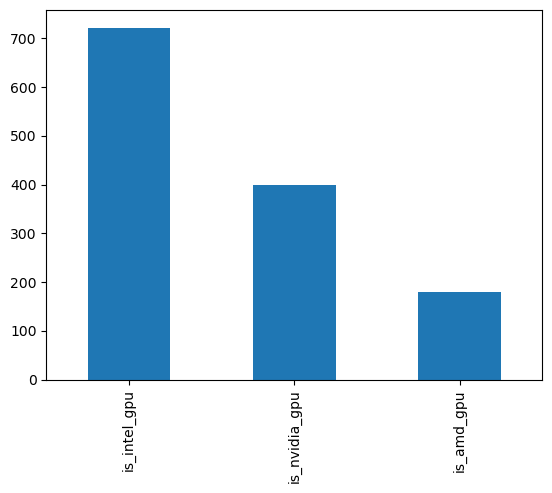

In [6]:
df[['is_intel_gpu', 'is_amd_gpu', 'is_nvidia_gpu']].sum().sort_values(ascending=False).head(100).plot(kind='bar')

In [7]:
print("Size of the Dataframe: \n", df.size)
print("Shape of the Dataframe: \n", df.shape)
print("Main Columns List from Dataframe: \n", df.columns)
print("Dimension of the Entry values: \n", df.ndim)
print("Data Types of Each Columns: \n", df.dtypes)

Size of the Dataframe: 
 26060
Shape of the Dataframe: 
 (1303, 20)
Main Columns List from Dataframe: 
 Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_in_euros',
       'resolution_width', 'resolution_height', 'screen_size', 'pixel_density',
       'is_intel_gpu', 'is_amd_gpu', 'is_nvidia_gpu', 'brand'],
      dtype='object')
Dimension of the Entry values: 
 2
Data Types of Each Columns: 
 laptop_ID              int64
Company               object
Product               object
TypeName              object
Inches               float64
Cpu                   object
Ram                   object
Memory                object
Gpu                   object
OpSys                 object
Weight                object
Price_in_euros       float64
resolution_width       int64
resolution_height      int64
screen_size          float64
pixel_density        float64
is_intel_gpu           int64
is_amd_gpu             int64
is_n

In [8]:
# Split dataset into Features(X) and target varibale (y)

X = df[['screen_size',  'Cpu', 'Ram', 'Memory', 'Gpu', 'Weight', 'OpSys',
        'pixel_density', 'Product']]
y = df['Price_in_euros']

In [9]:
X = pd.get_dummies(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize Features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [12]:
# Model Training Evaluation

# Linear Regression

reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)
y_pred = reg_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Linear Regression')
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)



Linear Regression
Mean Squared Error:  1.2213919305135578e+33
Mean Absolute Error:  1.7793676866726752e+16


In [13]:
# Ridge Regression

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Ridge Regression')
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Ridge Regression
Mean Squared Error: 137113.82877718986
Mean Absolute Error: 247.59303341914105


In [14]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Random Forest Regression')
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Random Forest Regression
Mean Squared Error: 116442.01597160666
Mean Absolute Error: 200.1717191215107


In [15]:
# Cross Validation

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print('Cross Validation RMSE: ', cv_rmse_scores)
print("Average Cross-Validation RMSE: ", np.mean(cv_rmse_scores))

Cross Validation RMSE:  [388.64431153 254.80613672 275.48527676 377.77533566 348.87012746]
Average Cross-Validation RMSE:  329.1162376258547


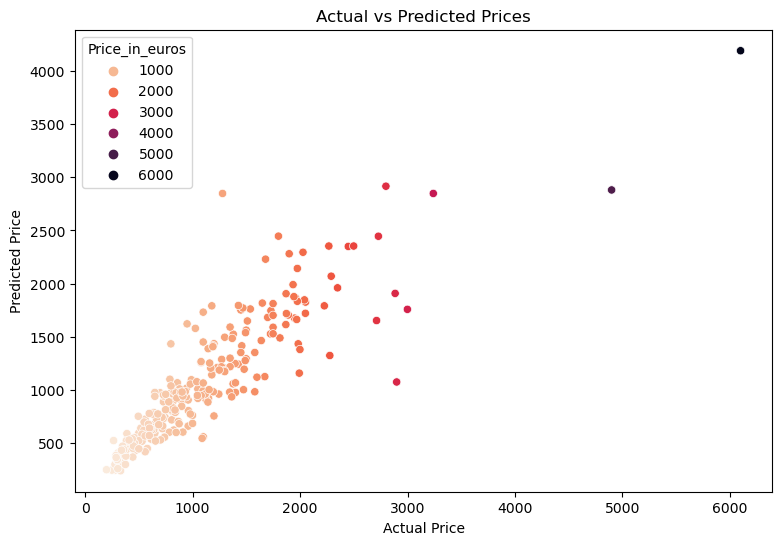

In [16]:
plt.figure(figsize=(9,6))

sns.scatterplot(x=y_test, y=y_pred, hue=y_test, palette=sns.color_palette("rocket_r", as_cmap=True))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

<Figure size 900x600 with 0 Axes>

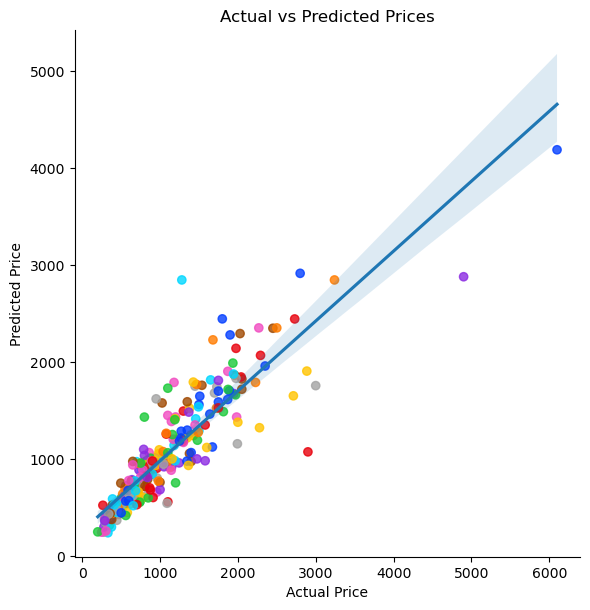

In [17]:
plt.figure(figsize=(9, 6))
sns.lmplot(x='Actual Price', y='Predicted Price', data=pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred}), height=6, aspect=1, scatter_kws={'color': sns.color_palette('bright', len(y_test))})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


In [18]:
# Hypothesis Testing

# F-test to test the significance of the overall model
X_train_const = sm.add_constant(X_train_scaled)
lin_model = sm.OLS(y_train, X_train_const)
lin_results = lin_model.fit()
f_value = lin_results.fvalue
p_value = lin_results.f_pvalue
print('F-statistic:', f_value)
print('p-value:', p_value)

# t-tests for individual feature coefficients
X_test_const = sm.add_constant(X_test_scaled)
lin_pred = lin_results.predict(X_test_const)
lin_residuals = y_test - lin_pred
lin_residuals_const = sm.add_constant(lin_residuals)

t_stats = []
p_values = []
for i, feature in enumerate(X.columns):
    lin_residuals_const = sm.add_constant(X_test_scaled[:, i])
    lin_model = sm.OLS(lin_residuals, lin_residuals_const)
    lin_results = lin_model.fit()
    t_stats.append(lin_results.tvalues[1])
    p_values.append(lin_results.pvalues[1])

t_stats = np.array(t_stats)
p_values = np.array(p_values)
significant_features = X.columns[p_values < 0.05]
print('Significant Features:', significant_features)

F-statistic: 34.61640719004188
p-value: 2.5682132180615413e-149
Significant Features: Index(['screen_size', 'pixel_density', 'Cpu_Intel Atom Z8350 1.92GHz',
       'Cpu_Intel Celeron Dual Core N3350 2.0GHz', 'Cpu_Intel Core i5 1.3GHz',
       'Cpu_Intel Core i5 2.9GHz', 'Memory_16GB Flash Storage',
       'Memory_32GB HDD', 'Gpu_Intel HD Graphics 500',
       'Gpu_Intel HD Graphics 615', 'Gpu_Intel Iris Graphics 550',
       'Gpu_Intel Iris Plus Graphics 640', 'Gpu_Nvidia GeForce GTX 940MX',
       'Weight_0.92kg', 'Weight_1.05kg', 'Weight_1.252kg', 'Weight_1.25kg',
       'Weight_1.2kg', 'Weight_1.37kg', 'Weight_1.4kg', 'Weight_1.83kg',
       'OpSys_Chrome OS', 'OpSys_Windows 10 S', 'OpSys_macOS',
       'Product_Chromebook C202SA', 'Product_MacBook 12"',
       'Product_MacBook Pro', 'Product_MateBook X',
       'Product_Pavilion 15-CK000nv', 'Product_Smartbook 142',
       'Product_Spin SP111-31', 'Product_Surface Laptop'],
      dtype='object')


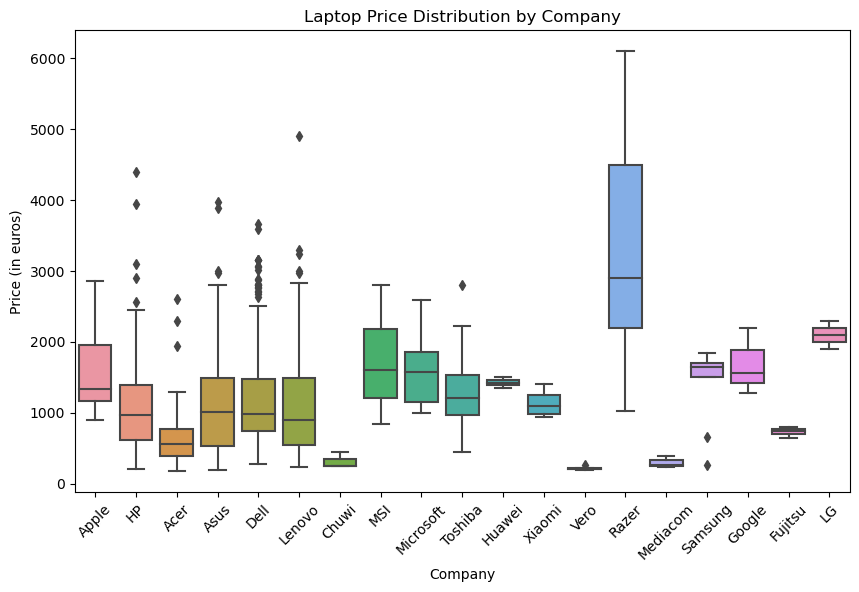

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Price_in_euros', data=df)
plt.xlabel('Company')
plt.ylabel('Price (in euros)')
plt.title('Laptop Price Distribution by Company')
plt.xticks(rotation=45)
plt.show()


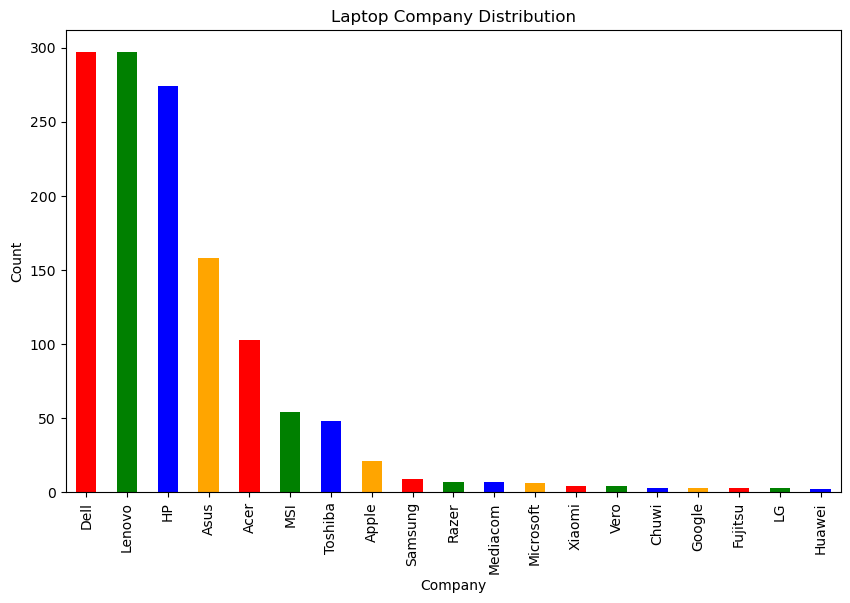

In [20]:
plt.figure(figsize=(10, 6))
df['Company'].value_counts().plot(kind='bar', color=['red', 'green', 'blue', 'orange'])
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Laptop Company Distribution')
plt.show()


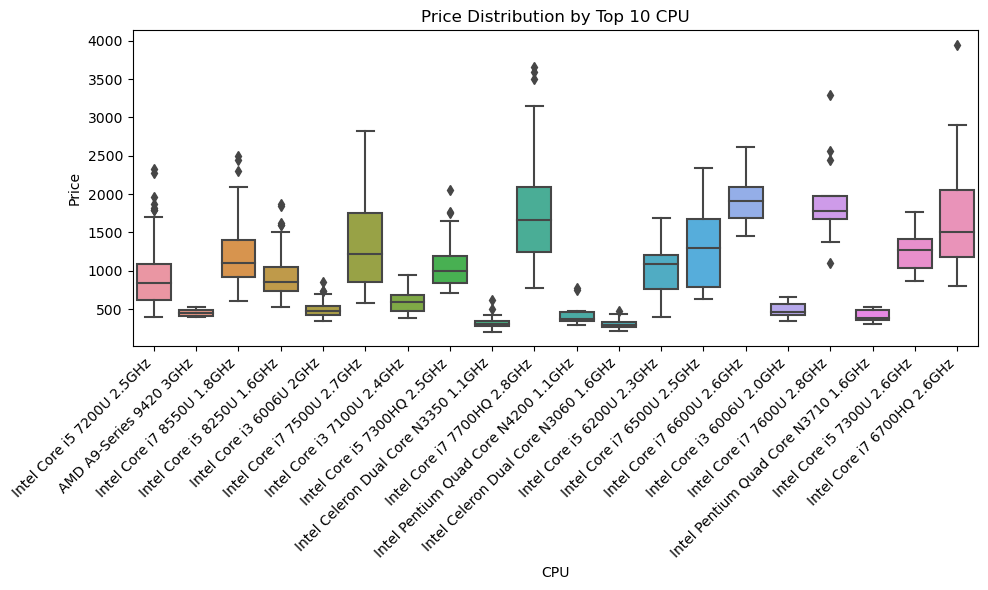

In [21]:
# Get the 10 most frequent CPU types
top_20_cpu = df['Cpu'].value_counts().head(20).index

# Filter the dataframe based on the top 10 CPU types
df_top_20_cpu = df[df['Cpu'].isin(top_20_cpu)]

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cpu', y='Price_in_euros', data=df_top_20_cpu)
plt.xticks(rotation=45, ha='right')
plt.xlabel('CPU')
plt.ylabel('Price')
plt.title('Price Distribution by Top 10 CPU')
plt.tight_layout()
plt.show()


In [22]:
# Preprocessing Categorical Variable

df_encoded = pd.get_dummies(df.drop(['Company', 'Product', 'TypeName', 'OpSys', 'Weight', 'brand'], axis=1), columns=['Gpu', 'Cpu', 'Memory', 'Ram'])

# Converting to Numpy Array

X =  df_encoded.drop('Price_in_euros', axis=1).values
y = df_encoded['Price_in_euros'].values

# Train Random Forest Regression
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

R-squared Score: 0.9660046481782139
Top 20 Feature Importances:
Ram_16GB: 0.1964517200055961
Ram_4GB: 0.16089589162170667
Ram_32GB: 0.13012660690498065
laptop_ID: 0.06537126368022103
Inches: 0.042886905125199354
screen_size: 0.03479009846282897
Ram_8GB: 0.033195425671429385
resolution_width: 0.031458175512337844
resolution_height: 0.02469495834757596
Memory_512GB SSD: 0.01729421114080644
Cpu_Intel Core i7 7820HK 2.9GHz: 0.016512118590772024
Gpu_Nvidia GeForce GTX 1070: 0.015213555920487471
Memory_1TB HDD: 0.010440783563295196
Memory_1TB SSD: 0.010139411638690336
Gpu_Nvidia Quadro M3000M: 0.009234946759789036
Cpu_Intel Core i7 7700HQ 2.8GHz: 0.008531424946924018
Cpu_Intel Core i5 6200U 2.3GHz: 0.00850996812148856
Cpu_Intel Xeon E3-1535M v5 2.9GHz: 0.00786033428877838
Gpu_Nvidia Quadro M1200: 0.007487559879108995
Cpu_Intel Core i5 7200U 2.5GHz: 0.007135223977513102


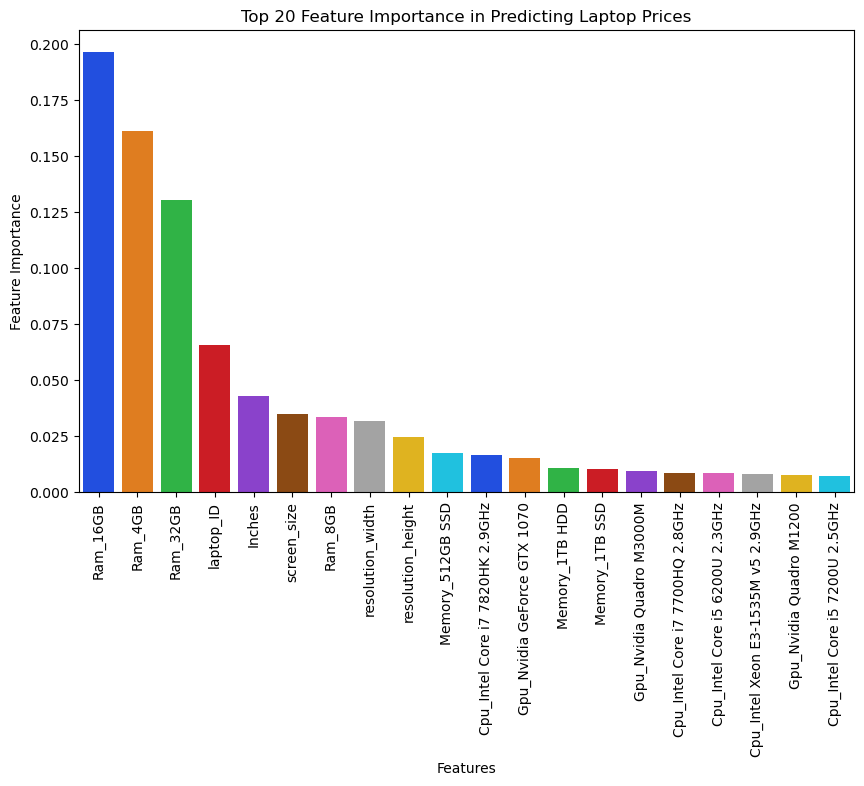

In [23]:
# feature importances
feature_importance = model.feature_importances_

# feature names
feature_names = df_encoded.drop('Price_in_euros', axis=1).columns

# Sort the features
sorted_indices = feature_importance.argsort()[::-1]
top_features_indices = sorted_indices[:20]  # top 20

# top 20 feature names and importances
top_feature_names = feature_names[top_features_indices]
top_feature_importance = feature_importance[top_features_indices]

# R-squared score
r2 = model.score(X, y)

print("R-squared Score:", r2)

print("Top 20 Feature Importances:")
for feature, importance in zip(top_feature_names, top_feature_importance):
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_names, y=top_feature_importance, palette='bright')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 20 Feature Importance in Predicting Laptop Prices')
plt.xticks(rotation=90)
plt.show()
